<a href="https://colab.research.google.com/github/sarahwierzbicki/projects/blob/main/Gym_Attendance_Decision_Tree_for_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
from patsy import dmatrices, dmatrix
%matplotlib inline

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
#add column to see if the gym is crowded
df.loc[df['number_people'] >= 50, 'crowded'] = 'crowded'
df.loc[df['number_people'] < 50, 'crowded'] = 'not crowded'

print(df)

       number_people                       date  timestamp  day_of_week  \
0                 37  2015-08-14 17:00:11-07:00      61211            4   
1                 45  2015-08-14 17:20:14-07:00      62414            4   
2                 40  2015-08-14 17:30:15-07:00      63015            4   
3                 44  2015-08-14 17:40:16-07:00      63616            4   
4                 45  2015-08-14 17:50:17-07:00      64217            4   
...              ...                        ...        ...          ...   
62179             23  2017-03-18 18:42:28-07:00      67348            5   
62180             21  2017-03-18 18:52:35-07:00      67955            5   
62181             25  2017-03-18 19:02:40-07:00      68560            5   
62182             18  2017-03-18 19:12:47-07:00      69167            5   
62183             23  2017-03-18 19:22:51-07:00      69771            5   

       is_weekend  is_holiday  temperature  is_start_of_semester  \
0               0           0  

In [ ]:
#we only want to work with integers so we'll convert the temperature float into an int
#drop the date column and is holiday column(no instances of 1)
df['temperature'] = df['temperature'].astype(int)

df.drop('date', axis = 1, inplace=True)
df.drop('is_holiday', axis = 1, inplace=True)
df.drop('number_people', axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             62184 non-null  int64 
 1   day_of_week           62184 non-null  int64 
 2   is_weekend            62184 non-null  int64 
 3   temperature           62184 non-null  int64 
 4   is_start_of_semester  62184 non-null  int64 
 5   is_during_semester    62184 non-null  int64 
 6   month                 62184 non-null  int64 
 7   hour                  62184 non-null  int64 
 8   crowded               62184 non-null  object
dtypes: int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

target variable → crowded



In [ ]:
feature_cols = ['hour', 'day_of_week', 'month', 'temperature']
X = df[feature_cols]
y = df.crowded

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, shuffle=True)

In [ ]:
clf = DecisionTreeClassifier(random_state=1)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9066252144082333


In [ ]:
from IPython.display import Image
import six
from six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [ ]:
feature_cols

['hour', 'day_of_week', 'month', 'temperature']

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     crowded       0.74      0.75      0.74      3363
 not crowded       0.95      0.94      0.94     15293

    accuracy                           0.91     18656
   macro avg       0.84      0.85      0.84     18656
weighted avg       0.91      0.91      0.91     18656



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 2533   830]
 [  912 14381]]


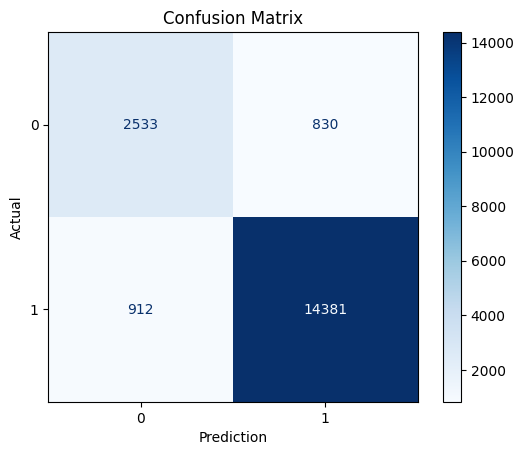

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

[Text(0, 0.5, 'crowded'), Text(0, 1.5, 'not crowded')]

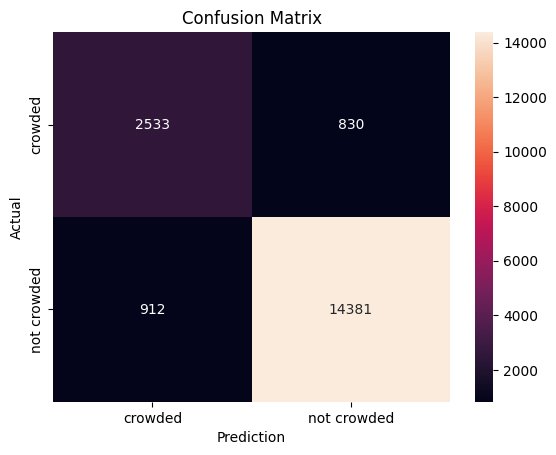

In [ ]:
plot = sns.heatmap(cm, annot=True, fmt='g')
plot.set_xlabel('Prediction');plot.set_ylabel('Actual');
plot.set_title('Confusion Matrix');
plot.xaxis.set_ticklabels(['crowded', 'not crowded']); plot.yaxis.set_ticklabels(['crowded', 'not crowded'])